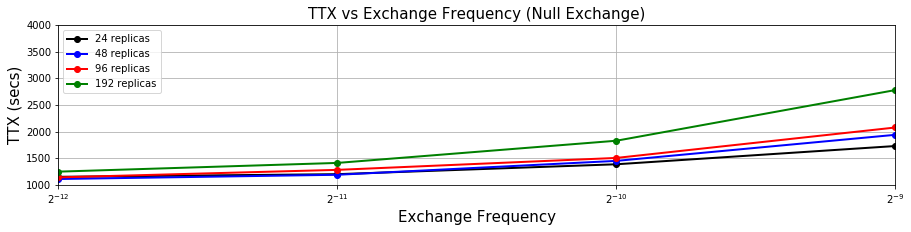

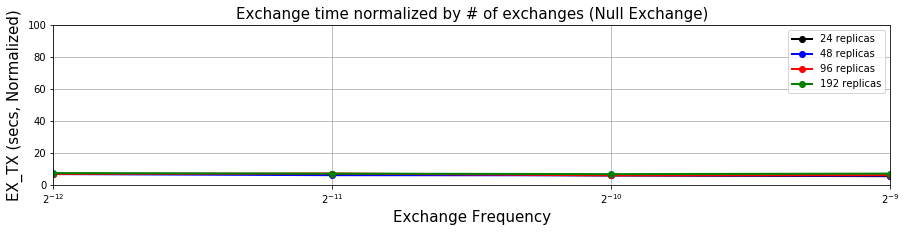

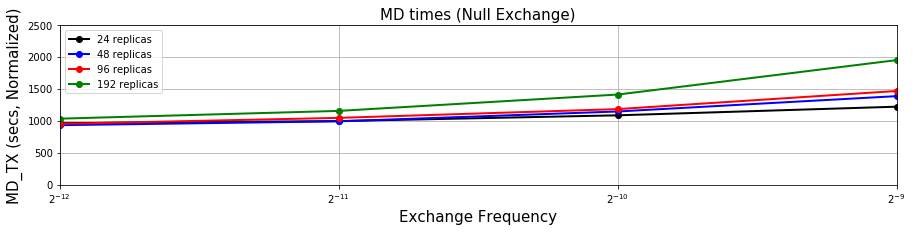

In [53]:
import os
import sys
import glob
import pprint
import radical.utils as ru
import radical.pilot as rp
import radical.entk as re
import radical.analytics as ra
import pickle
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np


def blockPrint():
    sys.stdout = open(os.devnull, 'w')


def enablePrint():
    sys.stdout = sys.__stdout__


blockPrint()
pwd = os.getcwd()

print pwd



ex_frequency = [0.00024414062, 0.00048828125, 0.0009765625, 0.001953125] 


TTX = []
MDTX = []  
EXTX=[]

wd = os.getcwd() + '/null_ex_runs/24_replicas_null/'

def gettimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)


    total                   = session.filter(etype='task', inplace=False)
    total_durations         = total.duration([re.states.SCHEDULED, re.states.DONE])
    TTX.append(total_durations)

    

def decomposetimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)

    with open(wd+'MDLIST_%s'%sessionname, 'rb') as mdlist:
        md_task_list=pickle.load(mdlist)
    md                   = session.filter(etype='task', inplace=False, uid=md_task_list)
    md_durations         = md.duration([re.states.SUBMITTED, re.states.COMPLETED])
    MDTX.append(md_durations)
    
    with open(wd+'EXLIST_%s'%sessionname, 'rb') as exlist:
        ex_task_list=pickle.load(exlist)
    
    
    ex                      = session.filter(etype='task', inplace=False,  uid=ex_task_list)
    ex_durations = ex.duration([re.states.SUBMITTED, re.states.COMPLETED])
    EXTX.append(ex_durations)

sessionnames = [
               're.session.mcewan.engr.rutgers.edu.scm177.017795.0041', 
               're.session.mcewan.engr.rutgers.edu.scm177.017795.0043', 
               're.session.mcewan.engr.rutgers.edu.scm177.017795.0045', 
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0000',
               ]
    
for i in range(4):    
    gettimes(sessionnames[i])
    decomposetimes(sessionnames[i])
    
x = np.asarray(ex_frequency)
t1  = np.asarray(TTX)
md1 = np.asarray(MDTX)
ex1 = np.asarray(EXTX)/np.asarray(ex_tasks)

TTX=[]
MDTX = []  
EXTX=[]

wd = os.getcwd() + '/null_ex_runs/48_replicas_null/'

sessionnames = [
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0014', 
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0016', 
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0018', 
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0020',
               ]

for i in range(4):    
    gettimes(sessionnames[i])
    decomposetimes(sessionnames[i])
    
x = np.asarray(ex_frequency)
t2  = np.asarray(TTX)
md2 = np.asarray(MDTX)
ex2 = np.asarray(EXTX)/np.asarray(ex_tasks)

TTX=[]
MDTX = []  
EXTX=[]

wd = os.getcwd() + '/null_ex_runs/96_replicas_null/'

sessionnames = [
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0022', 
               're.session.mcewan.engr.rutgers.edu.scm177.017797.0024', 
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0000', 
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0002',
               ]

for i in range(4):    
    gettimes(sessionnames[i])
    decomposetimes(sessionnames[i])
    
x = np.asarray(ex_frequency)
t3  = np.asarray(TTX)
md3 = np.asarray(MDTX)
ex3 = np.asarray(EXTX)/np.asarray(ex_tasks)

TTX=[]
MDTX = []  
EXTX=[]

wd = os.getcwd() + '/null_ex_runs/192_replicas_null/'

sessionnames = [
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0004', 
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0006', 
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0008', 
               're.session.mcewan.engr.rutgers.edu.scm177.017798.0022',
               ]

for i in range(4):    
    gettimes(sessionnames[i])
    decomposetimes(sessionnames[i])
    
x = np.asarray(ex_frequency)
t4  = np.asarray(TTX)
md4 = np.asarray(MDTX)
ex4 = np.asarray(EXTX)/np.asarray(ex_tasks)

print ex1
print ex2
print ex3
print ex4


    
enablePrint()


#fig=plt.figure(figsize=(10,5))
plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(x , t1, linewidth=2.0, marker='o', color='k', label = '24 replicas')
plt.plot(x , t2, linewidth=2.0, marker='o', color='b', label = '48 replicas')
plt.plot(x , t3, linewidth=2.0, marker='o', color='r', label = '96 replicas')
plt.plot(x , t4, linewidth=2.0, marker='o', color='g', label = '192 replicas')
plt.grid(True)
plt.xscale('log',basex=2)
plt.title("TTX vs Exchange Frequency (Null Exchange)",fontsize=15)
plt.axis([0.00024414062,0.001953125,1000,4000])
plt.xlabel("Exchange Frequency", fontsize=15)
plt.ylabel("TTX (secs)", fontsize=15)
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(312)
plt.plot(x , ex1, linewidth=2.0, marker='o', color='k', label = '24 replicas')
plt.plot(x , ex2, linewidth=2.0, marker='o', color='b', label = '48 replicas')
plt.plot(x , ex3, linewidth=2.0, marker='o', color='r', label = '96 replicas')
plt.plot(x , ex4, linewidth=2.0, marker='o', color='g', label = '192 replicas')
plt.grid(True)
plt.xscale('log',basex=2)
plt.title("Exchange time normalized by # of exchanges (Null Exchange)",fontsize=15)
plt.axis([0.00024414062,0.001953125,0,100])
plt.xlabel("Exchange Frequency", fontsize=15)
plt.ylabel("EX_TX (secs, Normalized)", fontsize=15)
plt.legend()

plt.figure(figsize=(15,10))
plt.subplot(313)
plt.plot(x , md1, linewidth=2.0, marker='o', color='k', label = '24 replicas')
plt.plot(x , md2, linewidth=2.0, marker='o', color='b', label = '48 replicas')
plt.plot(x , md3, linewidth=2.0, marker='o', color='r', label = '96 replicas')
plt.plot(x , md4, linewidth=2.0, marker='o', color='g', label = '192 replicas')
plt.grid(True)
plt.xscale('log',basex=2)
plt.title("MD times (Null Exchange)",fontsize=15)
plt.axis([0.00024414062,0.001953125,0,2500])
plt.xlabel("Exchange Frequency", fontsize=15)
plt.ylabel("MD_TX (secs, Normalized)", fontsize=15)
plt.legend()

plt.show()

